# Project: No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The no show apointment is a record of 110,527 medical appointments scheduled in Brazil. The dataset focuses on the unique characteristics of each patient that scheduled appointment and whether they missed the appointment or they attended the scheduled appointment.  
    <hr> PatientId         - this is a unique identifier for each Patient 
    <hr> AppointmentID     - this is a unique identifier for each appointment schedule 
    <hr> Gender            - this column shows whether the patient is either a male or a female
    <hr> ScheduledDay      - this shows the day and time at which the appointment was made
    <hr> AppointmentDay    - this records the day for which the appointment was scheduled for 
    <hr> Age               - the age of the patient is recorded here
    <hr> Neighbourhood     - the area where the client resides is recorded here 
    <hr> Scholarship       - medical insurance status of the patient. 0 means the patient has no insurance 
    <hr> Hipertension      - this column shows whether the patient has hypertension or not 
    <hr> Diabetes          - this records whether the client has diabetes or not    
    <hr> Handcap           - this records any physical challenge of the patient 
    <hr> SMS_received      - this records whether a reminder was sent to the patient or not
    <hr> No-show           - this column records whether the patient missed the appointment or not. No shows that the appointment was not missed. Yes means the appointment was missed. 

### Question(s) for Analysis
<hr> What proportion of appointments get missed?
<hr> Is gender a predictor of missing appointment? if yes, by what proportion?
<hr> Is age a predictor of missing appointments?
<hr> Do underlying health conditions predict missing appointments?


In [1]:
#importing packages required for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Importing data from csv file 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#checking the first 1000 columns of the dataframe 
df.head(1000)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#checking summary of the dataframe for errant data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#checking for any duplicate data in the dataframe 
sum(df.duplicated())

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

The dataset contains 110,527 rows of data with 14 columns. No row has missing data. A closer look shows that the ScheduleDay and AppointmentDay columns contain a mixture of date and time. And both columns are set as string. The Age column also has a '-1' as the age of a patient. 
To clean the ScheduleDay column will be split into two columns - schedule_day and schedule_time. Both of which will be set to the date time format.
The AppointmentDay columns as well contains date and time, however, the time is set to 00:00:00 for all the data. Thereby showing that the schedule time were not recorded. As such the time will be dropped and only the date kept.
        

In [6]:
# modifying column names and turning initial letter to lower cap
df.rename(columns=lambda x: x.lower().replace('-', '_'), inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#rename columns with spelling error and noSHOW COLUMN
df.rename(columns={'hipertension':'hypertension','no_show':'missed_appointment'}, inplace =True)
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [8]:
df01 = df.copy()
df02 = df.copy()

In [9]:
#this code splits the scheduledday and appointmentday into date and time 
split_column = ['scheduledday','appointmentday']
for c in split_column:
    df01[c] = df01[c].apply(lambda x: x.split("T")[0])
    df02[c] = df02[c].apply(lambda x: x.split("T")[1])


In [10]:
df01

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [11]:
df02

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment
0,2.987250e+13,5642903,F,18:38:08Z,00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,16:08:27Z,00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,16:19:04Z,00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,17:29:31Z,00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,16:07:23Z,00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,08:36:51Z,00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,15:05:12Z,00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,15:39:58Z,00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,08:02:16Z,00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,12:48:25Z,00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [12]:
#Renaming several columns to replace errors and make them more suitable 
df02.rename(columns={'appointmentday':'appointmenttime','scheduledday':'scheduledtime','handcap':'handicap'},inplace = True)

In [13]:
split_column1=['appointmenttime','scheduledtime']
for c in split_column1:
    df02[c] =df02[c].apply(lambda x:x.split("Z")[0])
df02

,patientid,appointmentid,gender,scheduledtime,appointmenttime,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed_appointment
0,2.987250e+13,5642903,F,18:38:08,00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,16:08:27,00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,16:19:04,00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,17:29:31,00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,16:07:23,00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,08:36:51,00:00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,15:05:12,00:00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,15:39:58,00:00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,08:02:16,00:00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,12:48:25,00:00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [14]:
clean_df = pd.merge(df01,df02, how = 'inner')
clean_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,appointmenttime,handicap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,00:00:00,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,00:00:00,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,00:00:00,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,00:00:00,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,00:00:00,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,00:00:00,0
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,00:00:00,0
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,00:00:00,0
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16,00:00:00,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25,00:00:00,0


In [15]:
#remove the appointment time column
clean_df.drop(columns = 'appointmenttime', inplace = True)
clean_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,0
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,0
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,0
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25,0


In [16]:
clean_df.shape

(110527, 16)

In [17]:
clean_df.dtypes

patientid             float64
appointmentid           int64
gender                 object
scheduledday           object
appointmentday         object
age                     int64
neighbourhood          object
scholarship             int64
hypertension            int64
diabetes                int64
alcoholism              int64
handcap                 int64
sms_received            int64
missed_appointment     object
scheduledtime          object
handicap                int64
dtype: object

In [18]:
#changing the scheduleddate, scheduledtime, appointmentdate to datetime format
to_change = ['scheduledday', 'appointmentday']
for c in to_change:
    clean_df[c] = pd.to_datetime(clean_df[c])

In [19]:
clean_df.dtypes

patientid                    float64
appointmentid                  int64
gender                        object
scheduledday          datetime64[ns]
appointmentday        datetime64[ns]
age                            int64
neighbourhood                 object
scholarship                    int64
hypertension                   int64
diabetes                       int64
alcoholism                     int64
handcap                        int64
sms_received                   int64
missed_appointment            object
scheduledtime                 object
handicap                       int64
dtype: object

In [20]:
clean_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,0
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,0
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,0
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25,0


In [21]:
clean_df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,handicap
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.022248
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.161543
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000


In [22]:
clean_df.shape

(110527, 16)

In [23]:
clean_df.query('age == "-1"')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,08:58:13,0


In [24]:
clean_df.drop(labels = 99832, inplace = True)

In [25]:
clean_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0


In [26]:
#writing clean data to new file 
clean_df.to_csv('clean_df.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What proportion of appointments get missed?)

In [27]:
# Generating a dataframe for missed appointments and determining the number of missed appointment 
clean1 = clean_df.query('missed_appointment =="Yes"')
missed = clean1.missed_appointment.value_counts()
missed = missed.sum()
missed

22319

In [28]:
# Generating a dataframe for appointments attended and determining the number of missed appointment 
not_missed = clean_df.query('missed_appointment == "No"')
not_missed = not_missed.missed_appointment.value_counts()
not_missed = not_missed.sum()
not_missed

88207

Text(0.5, 1.0, 'Detail Outline of Appointment')

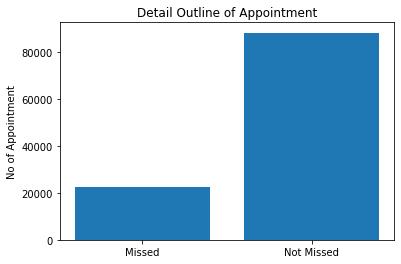

In [29]:
locations = [1, 2]
heights = [missed, not_missed]
labels = ['Missed' , 'Not Missed']
plt.bar(locations, heights, tick_label = labels)
plt.ylabel('No of Appointment')
plt.title('Detail Outline of Appointment')

Text(0.5, 1.0, 'A chart showing ratio of missed appointments')

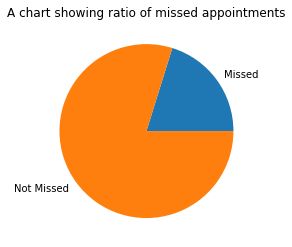

In [30]:
plt.pie(heights, labels = labels)
plt.title('A chart showing ratio of missed appointments')

In [31]:
#determine the percentage of missed appointments 
prop_missed = missed/(missed + not_missed) * 100
prop_missed

20.193438647919944

###Results show that about 20.2% of all appointments scheduled are missed by patients. 

### Research Question 2  (Is gender a predictor of missing appointment? if yes, by what proportion)

In [32]:
# analysing the percentage of missed appointment by each gender
gender_missed = clean_df.query('missed_appointment =="Yes"')
gender = gender_missed.groupby('gender')['missed_appointment'].value_counts()
gender

gender  missed_appointment
F       Yes                   14594
M       Yes                    7725
Name: missed_appointment, dtype: int64

Text(0.5, 1.0, 'No of Missed Appointments by Gender')

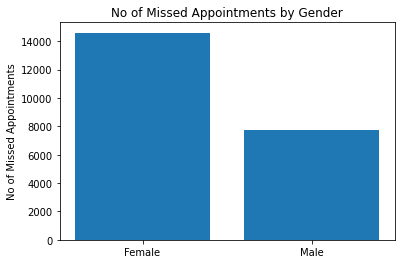

In [33]:
locations = [1, 2]
heights = [gender[0], gender[1]]
labels = ['Female' , 'Male']
plt.bar(locations, heights, tick_label = labels)
plt.ylabel('No of Missed Appointments')
plt.title('No of Missed Appointments by Gender')

In [34]:
#checking the proportion of missed appointment by each gender to the total scheduled appointment by each gender
f = clean_df['gender'].value_counts()['F'] #total number of female that scheduled appointments 
m =  clean_df['gender'].value_counts()['M'] #total number of males that scheduled appointments
ratio = f/m
print(f)
print (m)
print (f+m)
print (ratio )

71839
38687
110526
1.856928684054075


## The number of women who scheduled appointments is nearly twice the number of men who schedule hospital visits

In [35]:
# percentage of women who missed appointment 
female_prop = gender[0]/f * 100
female_prop

20.314870752655242

In [36]:
# percentage of men who missed appointment
male_prop =gender[1]/m * 100
male_prop

19.967947889471915

###About 19.96% of Men missed scheduled appointments while about 20.31% of women missed scheduled appointments. More women
tend to miss their appointments but the margin is close as not to be a reliable predictor of missing appointment

### Research Question 3 (Is age a predictor of missing appointments?)

In [37]:
clean_df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<AxesSubplot:>

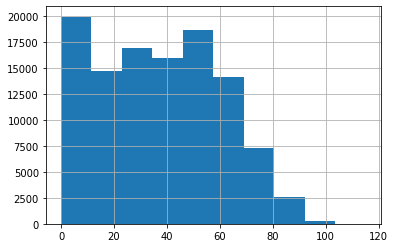

In [38]:
# Age distribution for which appointment was scheduled 
clean_df.age.hist()

### the highest number of appointmments were scheduled for children between the ages of 0 and 10, followed by people between the ages of 50 and 60

In [39]:
bin_edge = [0, 1, 13, 25, 37, 49, 61, 73,  85, 97, 110]
bin_label = ['Infants', 'Children', 'Youth', 'Mature I', 'Mature II','Mature III','Elderly','Pre-senile','Senile', 'Long Lifer']
clean1['age_group'] = pd.cut(df['age'],bin_edge,labels = bin_label)
clean1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap,age_group
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,0,Youth
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,0,Mature II
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,08:44:12,0,Mature I
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,09:28:57,0,Mature II
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,07:51:14,0,Mature I
21,1.215484e+13,5628338,F,2016-04-27,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes,10:50:45,0,Children
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,13:29:16,0,Children
31,3.112849e+11,5628907,M,2016-04-27,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,12:07:14,0,Children
44,2.741649e+11,5635414,F,2016-04-28,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,13:27:27,0,Pre-senile
48,8.545415e+12,5618643,F,2016-04-26,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,07:19:49,0,Mature III


In [64]:
sns.countplot(x ='age_group', data= 'clean1')

AttributeError: 'str' object has no attribute 'get'

In [40]:
#Determine the number of missed appointment by each age group 
count = clean1.groupby('age_group')['missed_appointment'].value_counts()
count

age_group   missed_appointment
Infants     Yes                    415
Children    Yes                   3556
Youth       Yes                   4208
Mature I    Yes                   3943
Mature II   Yes                   3540
Mature III  Yes                   3212
Elderly     Yes                   1766
Pre-senile  Yes                    845
Senile      Yes                    191
Long Lifer  Yes                      1
Name: missed_appointment, dtype: int64

In [41]:
count.sum()

21677

<AxesSubplot:xlabel='age_group,missed_appointment'>

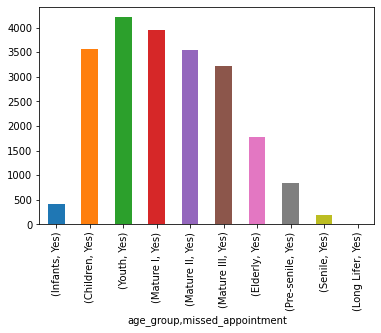

In [42]:
count.plot (kind = 'bar')

The highest number of missed appointment is recorded by youth, followed by Mature I, Mature II and children 
missed almost equal numbers of appointments. The number of missed appointments reduced with increasing age.


In [43]:
# creating a age category for all the available dataset
bin_edge = [0, 1, 13, 25, 37, 49, 61, 73,  85, 97, 110]
bin_label = ['Infants', 'Children', 'Youth', 'Mature I', 'Mature II','Mature III','Elderly','Pre-senile','Senile', 'Long Lifer']
clean_df['age_group'] = pd.cut(df['age'],bin_edge,labels = bin_label)
clean_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0,Elderly
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0,Mature III
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0,Elderly
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0,Children
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0,Mature III
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,0,Pre-senile
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,0,Youth
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,0,Mature II
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16,0,Youth
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25,0,Youth


In [44]:
#retrieving the no of missed and attended appointments by age group
count1 = clean_df.groupby('age_group')['missed_appointment'].value_counts()
count1

age_group   missed_appointment
Infants     No                     1858
            Yes                     415
Children    No                    12771
            Yes                    3556
Youth       No                    12252
            Yes                    4208
Mature I    No                    13574
            Yes                    3943
Mature II   No                    13834
            Yes                    3540
Mature III  No                    15405
            Yes                    3212
Elderly     No                    10115
            Yes                    1766
Pre-senile  No                     4533
            Yes                     845
Senile      No                      951
            Yes                     191
Long Lifer  No                       12
            Yes                       1
Name: missed_appointment, dtype: int64

In [45]:
count2 = clean_df.age_group.value_counts()
count2

Mature III    18617
Mature I      17517
Mature II     17374
Youth         16460
Children      16327
Elderly       11881
Pre-senile     5378
Infants        2273
Senile         1142
Long Lifer       13
Name: age_group, dtype: int64

In [46]:
print(count)
print (count2)

age_group   missed_appointment
Infants     Yes                    415
Children    Yes                   3556
Youth       Yes                   4208
Mature I    Yes                   3943
Mature II   Yes                   3540
Mature III  Yes                   3212
Elderly     Yes                   1766
Pre-senile  Yes                    845
Senile      Yes                    191
Long Lifer  Yes                      1
Name: missed_appointment, dtype: int64
Mature III    18617
Mature I      17517
Mature II     17374
Youth         16460
Children      16327
Elderly       11881
Pre-senile     5378
Infants        2273
Senile         1142
Long Lifer       13
Name: age_group, dtype: int64


In [47]:
#creating a function for calculating proportion of each age group
def prop(i):
    prop = count[i]/count2[i] *100
    
    return prop 

In [48]:
prop_infant = prop(0)
prop_infant

18.25780906291245

In [49]:
prop_children = prop(1)
prop_children

21.779873828627426

In [50]:
prop_youth =prop(2)
prop_youth

25.565006075334146

In [51]:
prop_matureI = prop(3)
prop_matureI

22.509562139635783

In [52]:
prop_matureII = prop(4)
prop_matureII

20.375273397030043

In [53]:
prop_matureIII = prop(5)
prop_matureIII

17.253048289198045

In [54]:
prop_elderly = prop(6)
prop_elderly

14.86406868108745

In [55]:
prop_pre_senile = prop(7)
prop_pre_senile

15.712160654518408

In [56]:
prop_senile = prop(8)
prop_senile

16.72504378283713

In [57]:
prop_longlifer = prop(9)
prop_longlifer

7.6923076923076925

In [58]:
#creating a list of the percentage missed appointments for each age group 
x =[prop_infant, prop_children, prop_youth, prop_matureI, prop_matureII, prop_matureIII, prop_elderly, prop_pre_senile, prop_senile, prop_longlifer]
print(x)

[18.25780906291245, 21.779873828627426, 25.565006075334146, 22.509562139635783, 20.375273397030043, 17.253048289198045, 14.86406868108745, 15.712160654518408, 16.72504378283713, 7.6923076923076925]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Infants'),
  Text(1, 0, 'Children'),
  Text(2, 0, 'Youth'),
  Text(3, 0, 'Mature I'),
  Text(4, 0, 'Mature II'),
  Text(5, 0, 'Mature III'),
  Text(6, 0, 'Elderly'),
  Text(7, 0, 'Pre-senile'),
  Text(8, 0, 'Senile'),
  Text(9, 0, 'Long Lifer')])

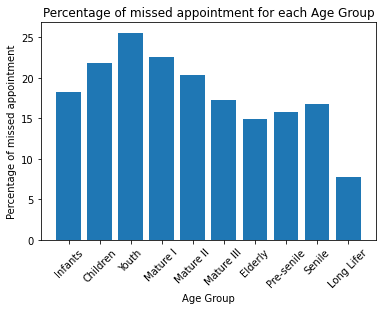

In [59]:
index = np.arange(len(x))
labels = ['Infants', 'Children', 'Youth', 'Mature I', 'Mature II','Mature III','Elderly','Pre-senile','Senile', 'Long Lifer']
plt.bar(index, x, tick_label = labels)
plt.xlabel('Age Group')
plt.ylabel('Percentage of missed appointment')
plt.title('Percentage of missed appointment for each Age Group')
plt.xticks(rotation = 45)

###from the graph it can be seen that, youth missed the highest proportion of appointment scheduled, followed by mature I, then Children,
mature II. Infants missed about 18% of their scheduled appointments followed by the senile, pre_senile, mature III and long lifers missed
the lowest percentage of appointments.


### Research question 4 (DO UNDERLYING HEALTH CONDITIONS INFLUENCE MISSING APPOINTMENTS? )

In [60]:
clean_df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0,Elderly
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0,Mature III
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0,Elderly
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0,Children
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0,Mature III
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,0,Pre-senile
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15:05:12,0,Youth
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15:39:58,0,Mature II
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,08:02:16,0,Youth
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12:48:25,0,Youth


In [61]:
health_challenge = clean_df.query('hypertension != 0 or diabetes !=0 or alcoholism != 0 or handicap !=0')
health_challenge

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,missed_appointment,scheduledtime,handicap,age_group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0,Elderly
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0,Mature III
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,08:36:51,0,Pre-senile
25,5.819370e+12,5624020,M,2016-04-26,2016-04-29,46,CONQUISTA,0,1,0,0,0,1,No,15:04:17,0,Mature II
26,2.578785e+10,5641781,F,2016-04-29,2016-04-29,45,BENTO FERREIRA,0,1,0,0,0,0,No,14:19:42,0,Mature II
32,5.288356e+13,5637908,M,2016-04-29,2016-04-29,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,07:30:27,0,Mature III
34,1.999976e+13,5637963,F,2016-04-29,2016-04-29,79,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,07:34:30,0,Pre-senile
36,7.298459e+13,5637975,F,2016-04-29,2016-04-29,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,07:35:19,0,Elderly
37,1.578132e+12,5637986,F,2016-04-29,2016-04-29,64,TABUAZEIRO,1,1,1,0,0,0,No,07:35:56,0,Elderly
38,5.873316e+12,5609446,M,2016-04-20,2016-04-29,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No,15:54:18,0,Pre-senile


In [62]:
health_challenge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26412 entries, 0 to 110515
Data columns (total 17 columns):
patientid             26412 non-null float64
appointmentid         26412 non-null int64
gender                26412 non-null object
scheduledday          26412 non-null datetime64[ns]
appointmentday        26412 non-null datetime64[ns]
age                   26412 non-null int64
neighbourhood         26412 non-null object
scholarship           26412 non-null int64
hypertension          26412 non-null int64
diabetes              26412 non-null int64
alcoholism            26412 non-null int64
handcap               26412 non-null int64
sms_received          26412 non-null int64
missed_appointment    26412 non-null object
scheduledtime         26412 non-null object
handicap              26412 non-null int64
age_group             26406 non-null category
dtypes: category(1), datetime64[ns](2), float64(1), int64(9), object(4)
memory usage: 3.5+ MB


In [63]:
sns.barplot(x='hypertension', hue ='diabetes', data ='health_challenge')

AttributeError: 'str' object has no attribute 'get'

In [ ]:
missed_health = health_challenge.query('missed_appointment =="Yes"')
missed_health

In [ ]:
#this determines the percentage of people with health challenges that missed their appointments
prop_missed = missed_health.missed_appointment.value_counts()/health_challenge.missed_appointment.value_counts().sum() * 100
prop_missed

In [ ]:
#this creates a datframe for eole with no health challenge
healthy = clean_df.drop(health_challenge.index)
healthy

In [ ]:
healthy.info()

In [ ]:
#determine the percentage of eole with no health challenge that missed their appointments
healthy1 = healthy.query('missed_appointment =="Yes"')
healthy1

In [ ]:
prop_healthy = healthy1.missed_appointment.value_counts()/healthy.missed_appointment.value_counts().sum()*100
prop_healthy

In [ ]:
locations = [1,2]
heights =[prop_missed[0], prop_healthy[0]]
labels = ['Patients with health challenge','patients with no health challenge']
plt.bar(locations, heights, tick_label = labels)
plt.xlabel("Healthy status of Patients")
plt.ylabel("Percentage of missed appointments")
plt.title('Percentage of missed appointments by Patients ')

### Patients with no healthy challenge such as diabetes tend to miss more appointments as about 20.92% of them missed their scheduled appointments while only 17.86% of people with health challenges missed their scheduled appointments 

<a id='conclusions'></a>
## Conclusions
### Results show that 
<hr> About 20.2% of all appointments scheduled are missed by patients.
<hr> About 19.96% of Men missed scheduled appointments while about 20.31% of women missed scheduled appointments. More women
  tend to miss their appointments but the margin is close as not to be a reliable predictor of missing appointment
<hr> youth missed the highest proportion of appointment scheduled, followed by mature I, then Children, mature II. Infants missed about 18% of their scheduled appointments followed by the senile, pre_senile, mature III and long lifers missed the lowest percentage of appointments.
<hr> Patients with no healthy challenge such as diabetes tend to miss more appointments as about 20.92% of them missed their scheduled appointments while only 17.86% of people with health challenges missed their scheduled appointments. 

### Limitation of the data exploration
<hr> This analysis did not carry out any hypothesis testing. As such it is impossible to claim that the difference recorded in the results are statistically significant 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])